In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/weather-data/Weather Data.csv


# ****Data Loading

In [2]:
df=pd.read_csv('/kaggle/input/weather-data/Weather Data.csv')
df.head(10)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,1/1/2012 7:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,1/1/2012 8:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,1/1/2012 9:00,-1.3,-3.1,88,15,4.0,101.20,Fog


In [3]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [4]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8784 non-null   datetime64[ns]
 1   Temp_C            8784 non-null   float64       
 2   Dew Point Temp_C  8784 non-null   float64       
 3   Rel Hum_%         8784 non-null   int64         
 4   Wind Speed_km/h   8784 non-null   int64         
 5   Visibility_km     8784 non-null   float64       
 6   Press_kPa         8784 non-null   float64       
 7   Weather           8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


# Weather

In [6]:
weather= df['Weather'].unique()
for weathers in weather:
    print("->",weathers)

-> Fog
-> Freezing Drizzle,Fog
-> Mostly Cloudy
-> Cloudy
-> Rain
-> Rain Showers
-> Mainly Clear
-> Snow Showers
-> Snow
-> Clear
-> Freezing Rain,Fog
-> Freezing Rain
-> Freezing Drizzle
-> Rain,Snow
-> Moderate Snow
-> Freezing Drizzle,Snow
-> Freezing Rain,Snow Grains
-> Snow,Blowing Snow
-> Freezing Fog
-> Haze
-> Rain,Fog
-> Drizzle,Fog
-> Drizzle
-> Freezing Drizzle,Haze
-> Freezing Rain,Haze
-> Snow,Haze
-> Snow,Fog
-> Snow,Ice Pellets
-> Rain,Haze
-> Thunderstorms,Rain
-> Thunderstorms,Rain Showers
-> Thunderstorms,Heavy Rain Showers
-> Thunderstorms,Rain Showers,Fog
-> Thunderstorms
-> Thunderstorms,Rain,Fog
-> Thunderstorms,Moderate Rain Showers,Fog
-> Rain Showers,Fog
-> Rain Showers,Snow Showers
-> Snow Pellets
-> Rain,Snow,Fog
-> Moderate Rain,Fog
-> Freezing Rain,Ice Pellets,Fog
-> Drizzle,Ice Pellets,Fog
-> Drizzle,Snow
-> Rain,Ice Pellets
-> Drizzle,Snow,Fog
-> Rain,Snow Grains
-> Rain,Snow,Ice Pellets
-> Snow Showers,Fog
-> Moderate Snow,Blowing Snow


In [7]:
wind_speed = df['Wind Speed_km/h'].nunique()
print('Wind Speed_km/h:-',wind_speed)

Wind Speed_km/h:- 34


In [8]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

# ****Preprocessing

In [9]:
le = LabelEncoder()
df['Weather'] = le.fit_transform(df['Weather'])

# ****Exploratory Data Analysis

# Distribution of 'Temp_C'

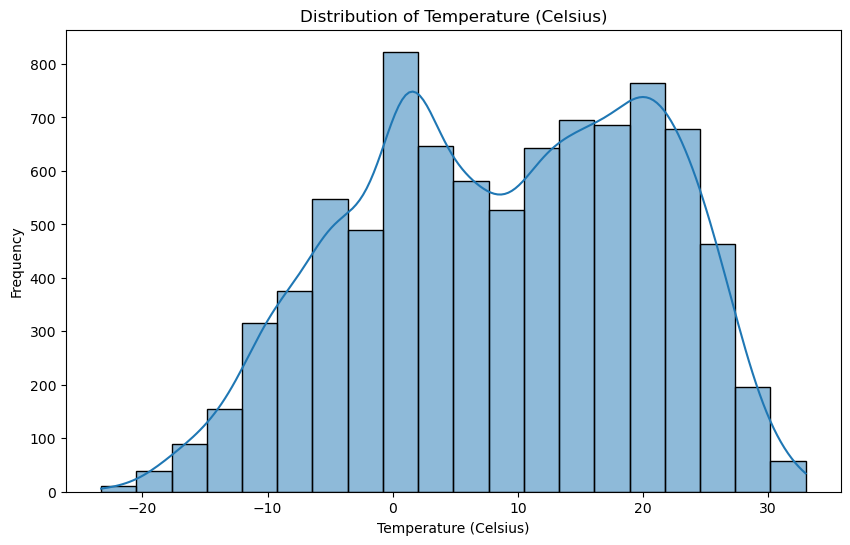

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Temp_C', bins=20, kde=True)
plt.title('Distribution of Temperature (Celsius)')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap for numeric columns

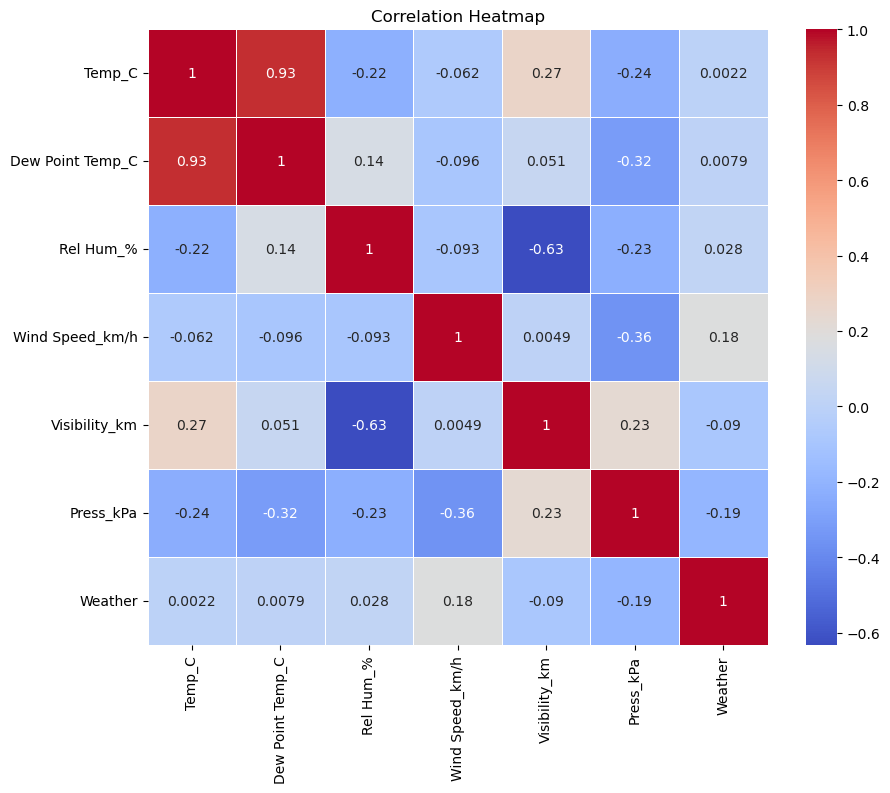

In [11]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# 'Weather' vs. 'Temp_C'

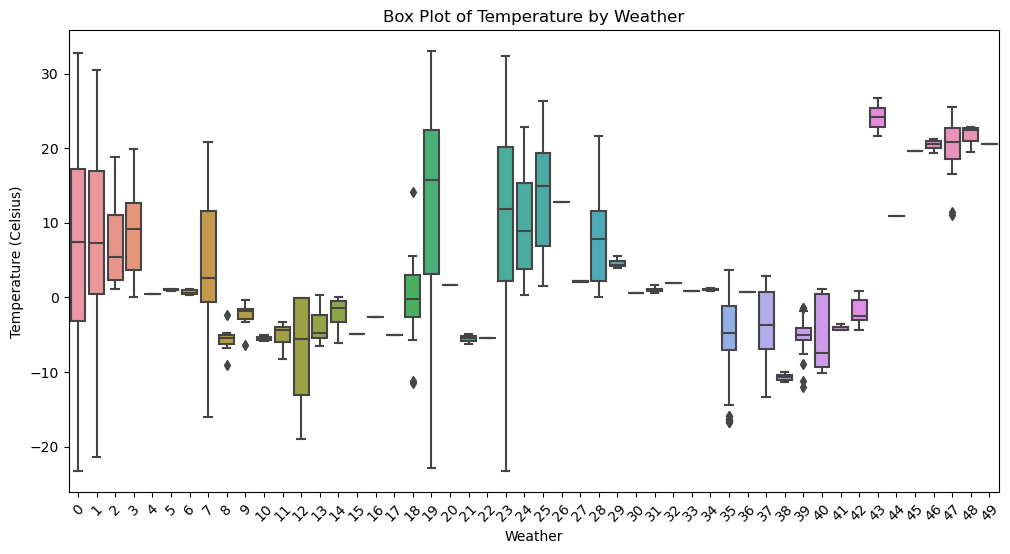

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Weather', y='Temp_C')
plt.xticks(rotation=45)
plt.title('Box Plot of Temperature by Weather')
plt.xlabel('Weather')
plt.ylabel('Temperature (Celsius)')
plt.show()


# Pair plot for numeric columns

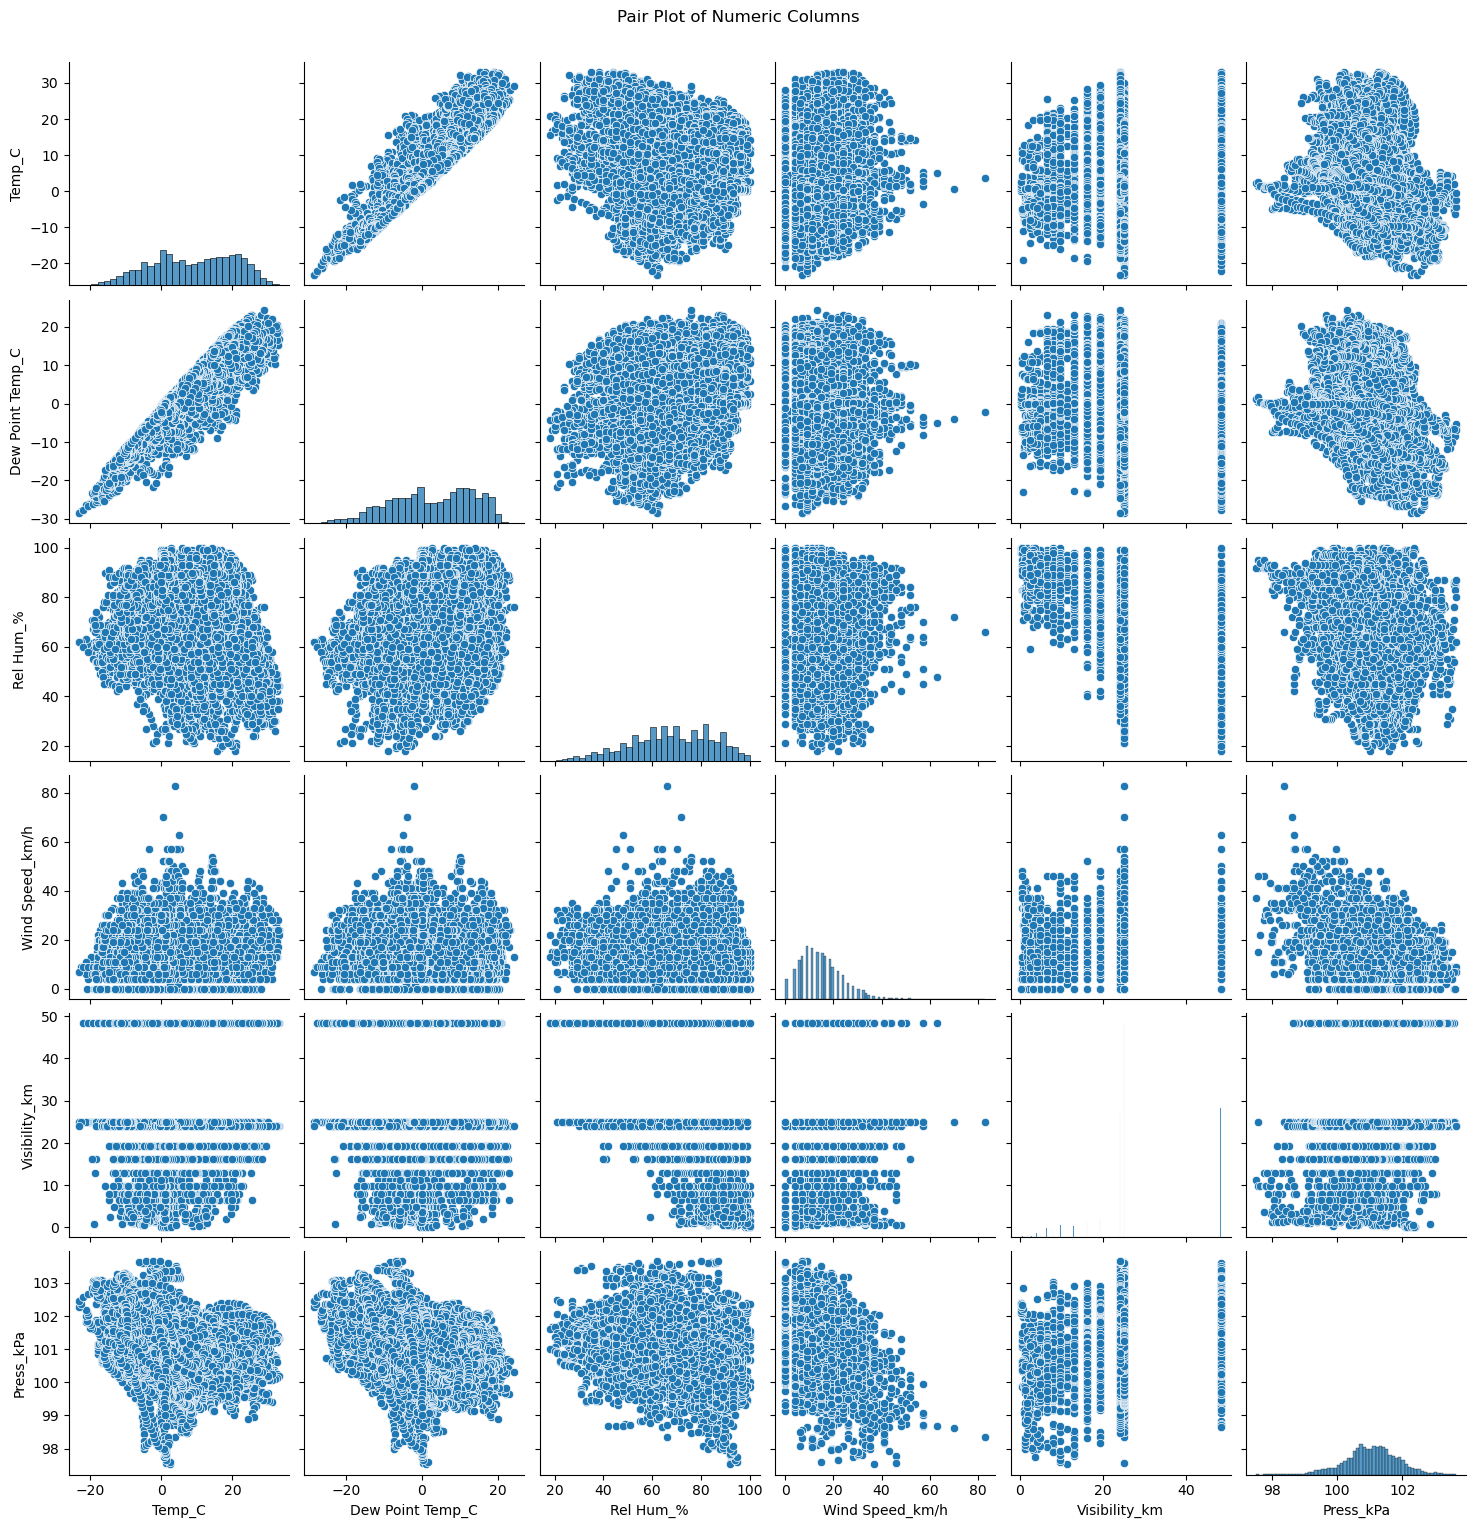

In [13]:
sns.pairplot(df[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']])
plt.suptitle('Pair Plot of Numeric Columns', y=1.02)
plt.show()


# Time Series Analysis

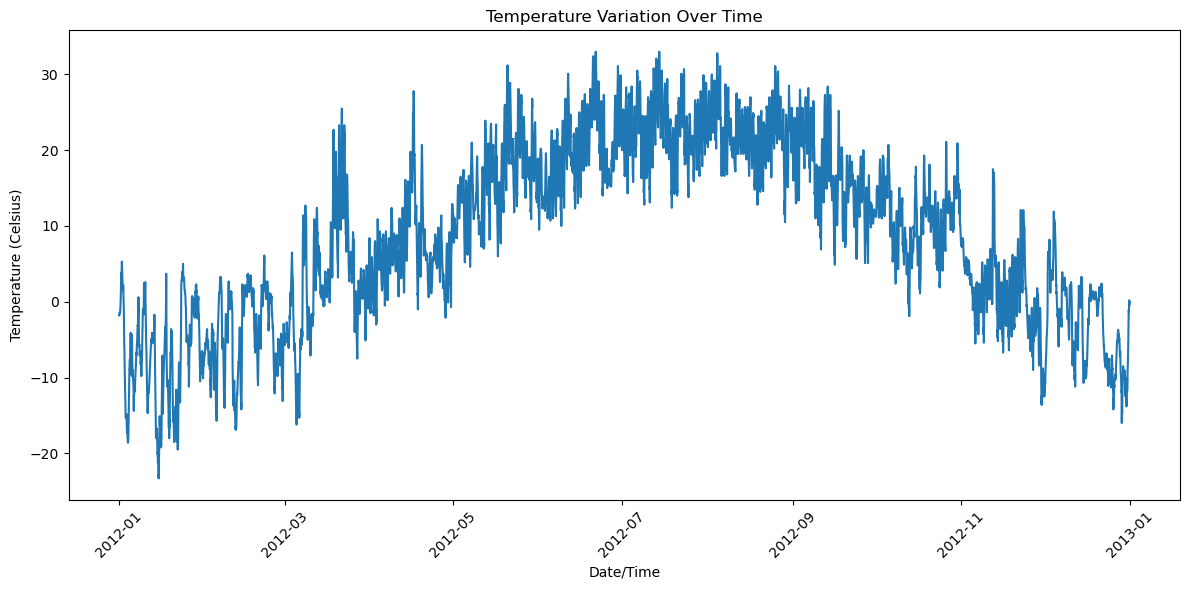

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date/Time', y='Temp_C')
plt.title('Temperature Variation Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (Celsius)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 'Weather'

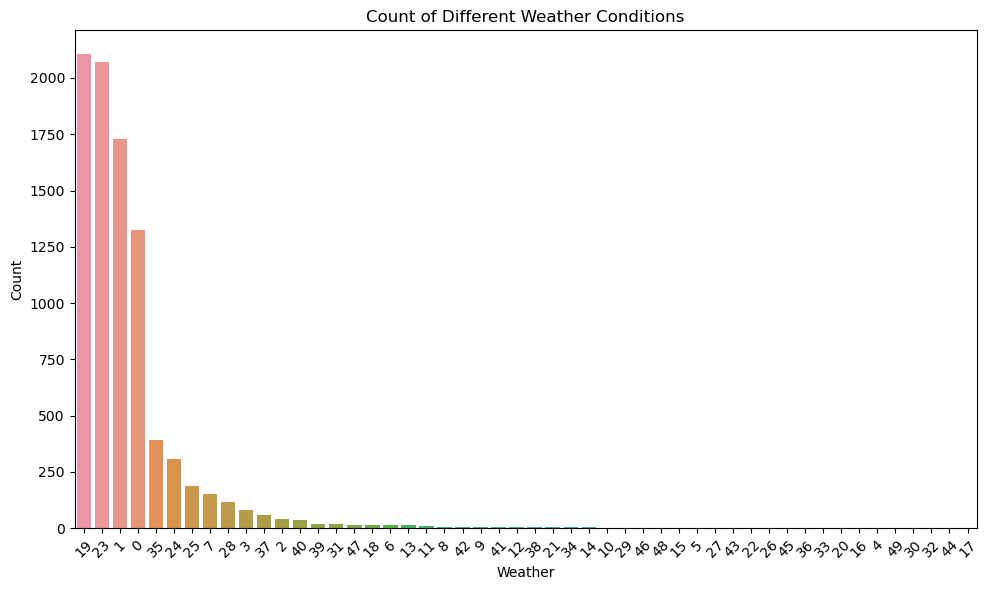

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Weather', order=df['Weather'].value_counts().index)
plt.title('Count of Different Weather Conditions')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly average temperature variation

In [16]:
df['Month'] = df['Date/Time'].dt.month
monthly_avg_temp = df.groupby('Month')['Temp_C'].mean()

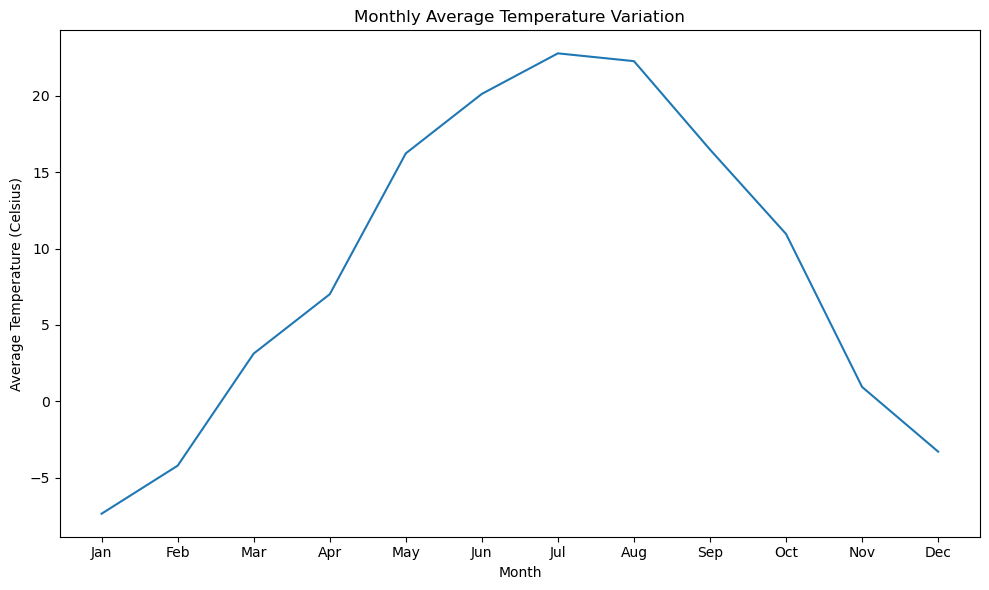

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_avg_temp.index, y=monthly_avg_temp.values)
plt.title('Monthly Average Temperature Variation')
plt.xlabel('Month')
plt.ylabel('Average Temperature (Celsius)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

# Wind Speed vs. Visibility 

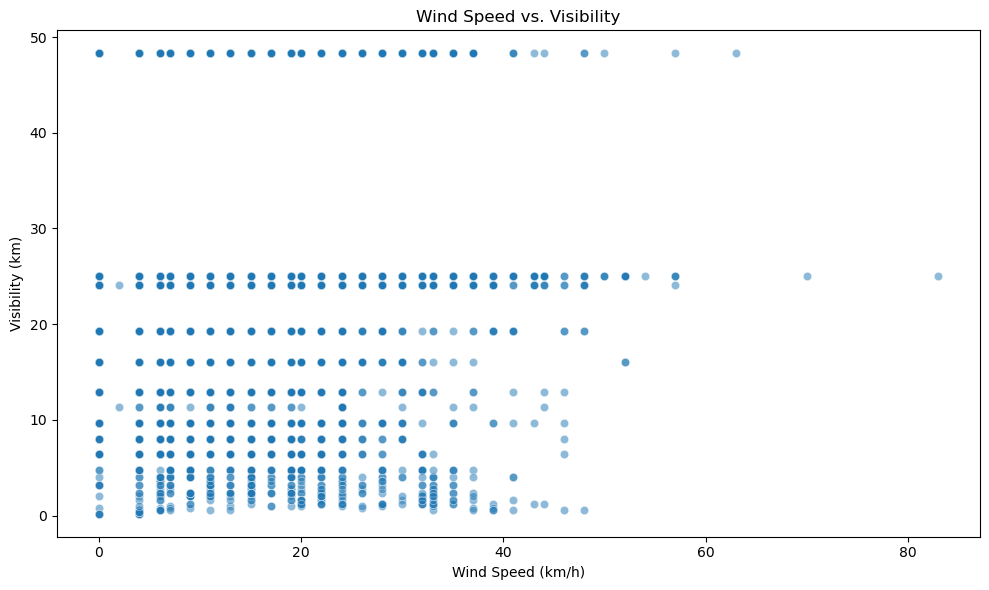

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Wind Speed_km/h', y='Visibility_km', alpha=0.5)
plt.title('Wind Speed vs. Visibility')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Visibility (km)')
plt.tight_layout()
plt.show()

# Humidity


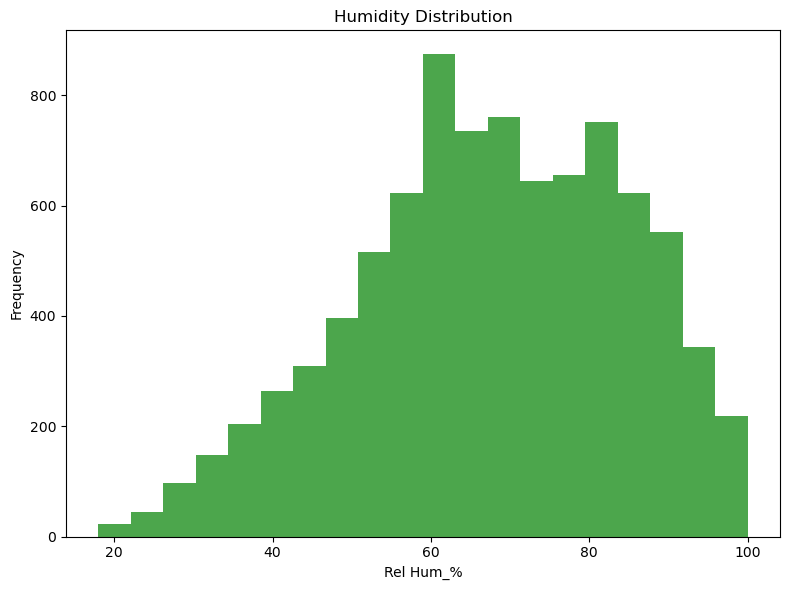

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(df['Rel Hum_%'], bins=20, color='green', alpha=0.7)
plt.xlabel('Rel Hum_%')
plt.ylabel('Frequency')
plt.title('Humidity Distribution')
plt.tight_layout()
plt.show()

# ****Modelling

# Droppping Columns

In [20]:
X = df.drop(['Temp_C', 'Date/Time'], axis=1)  # Excluding 'Date/Time' as a feature
y = df['Temp_C']

# Data Splitting

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models

In [22]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {'Mean Squared Error': mse, 'R-squared': r2}

# Results

In [23]:
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Mean Squared Error: {metrics['Mean Squared Error']:.4f}")
    print(f"  R-squared: {metrics['R-squared']:.4f}")
    print("=" * 30)


Linear Regression:
  Mean Squared Error: 0.6733
  R-squared: 0.9954
Decision Tree:
  Mean Squared Error: 0.2078
  R-squared: 0.9986
Random Forest:
  Mean Squared Error: 0.0520
  R-squared: 0.9996
Support Vector Regression:
  Mean Squared Error: 0.1964
  R-squared: 0.9986
